## Tools

In [365]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix

## Dataset

In [366]:
df = pd.read_csv("../data/01-modified-data/combined_data_clean01.csv")
data

,Site,Gender,Age,Handedness,DX,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full4 IQ
0,2.0,1.0,15.68,1.0,2.0,35.000000,9.948444,8.638132,0.100365,106.000000,106.0,107.00000
1,2.0,0.0,14.99,1.0,0.0,43.000000,9.948444,8.638132,0.100365,119.000000,123.0,125.00000
2,2.0,0.0,15.16,1.0,2.0,54.000000,9.948444,8.638132,0.100365,116.000000,131.0,126.00000
3,2.0,0.0,15.20,1.0,0.0,35.000000,9.948444,8.638132,0.100365,127.000000,98.0,113.00000
4,2.0,0.0,14.56,1.0,1.0,50.000000,9.948444,8.638132,0.100365,95.000000,87.0,89.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
352,1.0,1.0,12.42,1.0,1.0,56.000000,34.000000,22.000000,1.000000,103.591826,97.0,110.62924
353,1.0,0.0,9.17,1.0,0.0,42.604679,44.551369,43.196119,1.000000,103.591826,113.0,110.62924
354,1.0,0.0,12.67,1.0,NaN,58.000000,32.000000,36.000000,2.000000,103.591826,108.0,110.62924
355,1.0,1.0,12.50,1.0,NaN,49.000000,25.000000,24.000000,2.000000,103.591826,134.0,110.62924


In [367]:
columns_to_drop = ['DX']
y= df['DX']
feature_names = df.columns[df.columns != 'DX']
X = df.drop(columns_to_drop, axis=1)

In [368]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using Mutual Information
selector = SelectKBest(mutual_info_classif, k=6)  # Selecting the 6 best features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train_selected, y_train)

# Prediction and Evaluation
predictions = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


# Train Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train_selected, y_train)

# Prediction and Evaluation
predictions = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Display the best features
selected_features_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_features_indices)
print("Selected features:", [feature_names[i] for i in selected_features_indices])

Accuracy: 0.8241758241758241
Accuracy: 0.8241758241758241
Selected feature indices: [1 4 5 6 7 8]
Selected features: ['Gender', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ']


In [369]:
# Assuming predictions and y_test are already defined
# predictions: the predicted labels from your model
# y_test: the true labels

# Calculate precision and recall
precision = precision_score(y_test, predictions, average='macro')  # for binary classification
recall = recall_score(y_test, predictions, average='macro')  # recall is the same as sensitivity

# Print precision and recall
print(f"Precision: {precision}")
print(f"Recall/Sensitivity: {recall}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.8618721461187215
Recall/Sensitivity: 0.6328598484848484
Confusion Matrix:
[[61  3  0]
 [10 12  0]
 [ 2  1  2]]


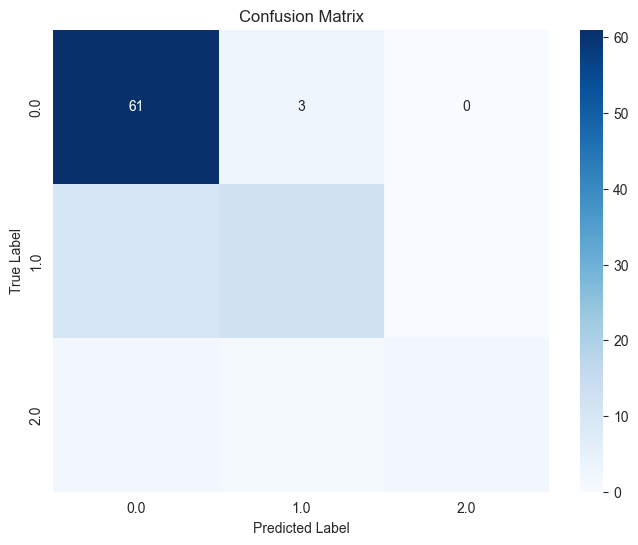

In [370]:
cm = confusion_matrix(y_test, predictions)
labels = np.unique(y_test)  # Change this if you have specific class names

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<Axes: >

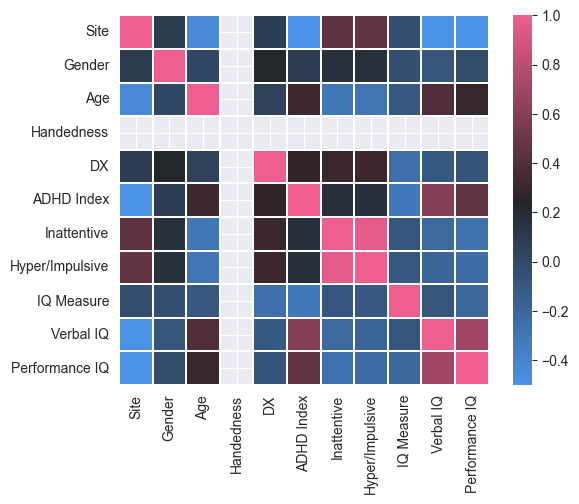

In [371]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

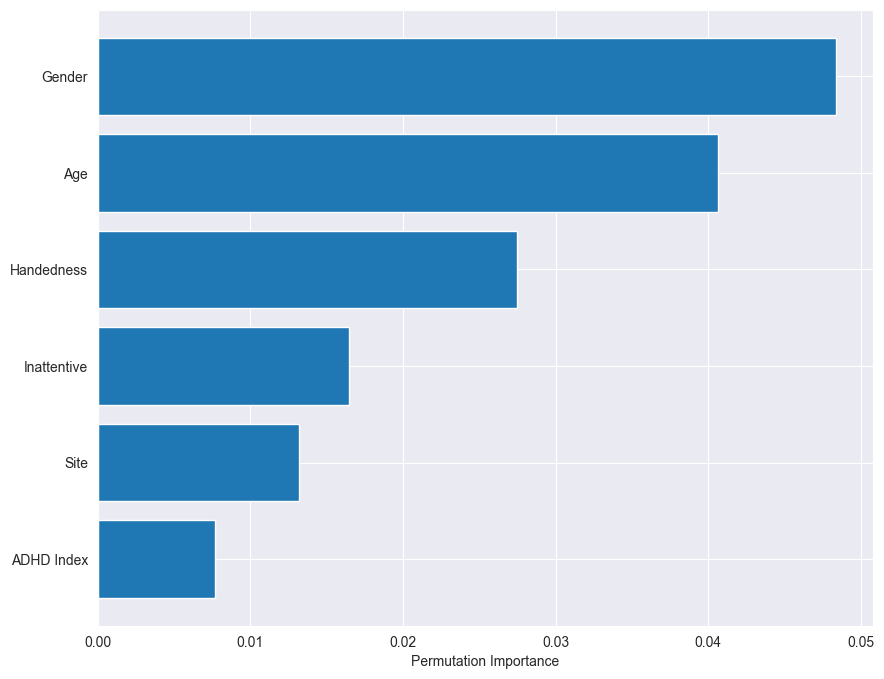

In [372]:
# Assuming you have a model with feature_importances_ attribute (like RandomForest)
from sklearn.inspection import permutation_importance

# Assuming clf is your trained Gaussian Naive Bayes model
result = permutation_importance(clf, X_test_selected, y_test, n_repeats=10, random_state=42)

# Plotting
plt.figure(figsize=(10, 8))
sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_test_selected.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test_selected.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

<Axes: xlabel='Verbal IQ', ylabel='Count'>

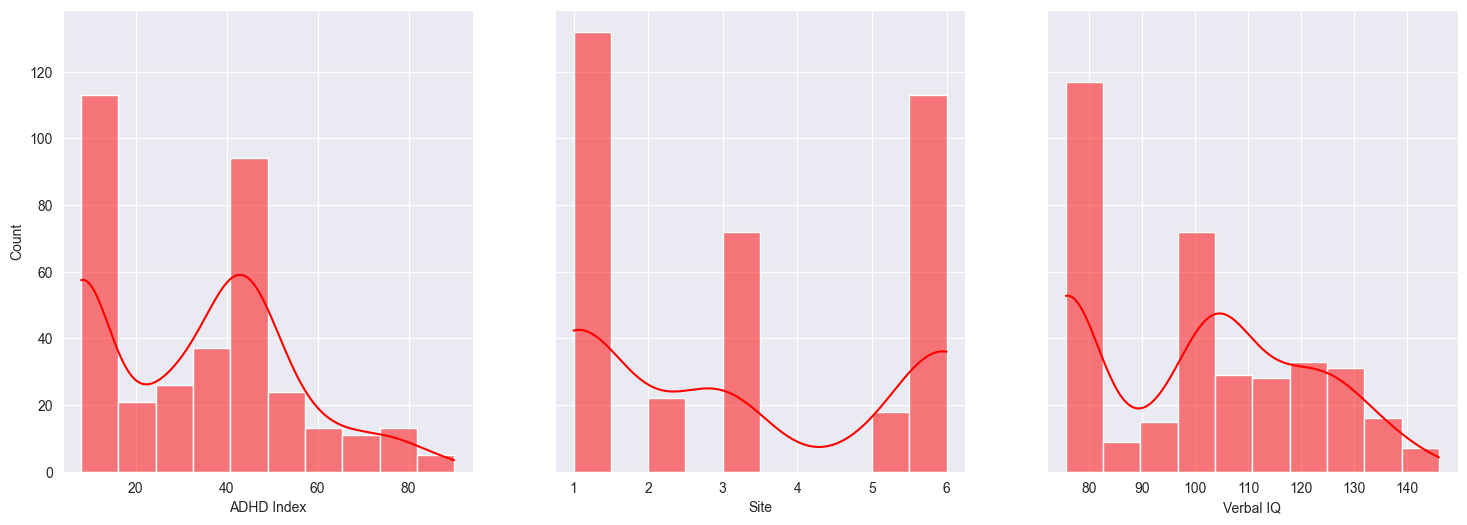

In [373]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="ADHD Index", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="Site", kde=True, color='r')
sns.histplot(data, ax=axes[2], x="Verbal IQ", kde=True, color='r')

In [374]:
data.head()

,Site,Gender,Age,Handedness,DX,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full4 IQ
0,2.0,1.0,15.68,1.0,2.0,35.0,9.948444,8.638132,0.100365,106.0,106.0,107.0
1,2.0,0.0,14.99,1.0,0.0,43.0,9.948444,8.638132,0.100365,119.0,123.0,125.0
2,2.0,0.0,15.16,1.0,2.0,54.0,9.948444,8.638132,0.100365,116.0,131.0,126.0
3,2.0,0.0,15.20,1.0,0.0,35.0,9.948444,8.638132,0.100365,127.0,98.0,113.0
4,2.0,0.0,14.56,1.0,1.0,50.0,9.948444,8.638132,0.100365,95.0,87.0,89.0


In [375]:
new_df = df.loc[:, ['Site', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ','DX']]

In [376]:
new_df.to_csv('../data/01-modified-data/combined_data_clean02.csv', index=False)